In [11]:
import torch
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
file_path = "data/signal_20_obligatory1_train.tsv"
feature_field, target_field = "text", "source"

In [46]:
df = pd.read_csv(file_path, sep="\t")
df

,source,text
0,Uncova,Adeboye_PROPN Amosu_PROPN Tanzania_PROPN coach...
1,4 Traders,deal_ADJ type_NOUN Acquisition_NOUN deal_PROPN...
2,MyInforms,Santa_PROPN Clara_PROPN centenarian_NOUN break...
3,EIN News,12:05_NUM Gmt_PROPN Reflektor_NOUN Tape_NOUN s...
4,MyInforms,Midlands_PROPN lawmaker_NOUN distribute_VERB t...
...,...,...
75136,NewsR.in,view_NOUN increase_ADJ traffic_NOUN Roshan_PRO...
75137,Reuters,Pr_PROPN Newswire_PROPN Austin_PROPN Texa_NOUN...
75138,Yahoo! News Australia,corrupt_ADJ cop_NOUN confess_VERB extort_VERB ...
75139,Marketplace,today_NOUN Awesomenesstv_PROPN lead_VERB compa...


In [4]:
targets, features = df.to_numpy().T
features[:2] 

array(['Adeboye_PROPN Amosu_PROPN Tanzania_PROPN coach_NOUN Charles_NOUN Mkwasa_PROPN declare_VERB side’_NOUN readiness_NOUN take_VERB on_ADV Nigeria_PROPN weekend’_NOUN 2017_NUM african_ADJ cup_NOUN qualifier_NOUN bill_VERB national_ADJ stadium_NOUN Dar_PROPN e_PROPN Salaam_PROPN Taifa_NOUN star_NOUN perfect_VERB strategy_NOUN Turkey_PROPN past_ADJ one_NUM week_NOUN ahead_NOUN crucial_ADJ clash_NOUN where_ADV play_VERB high-profile_NOUN friend_ADV Libya_PROPN last_ADV Friday_ADV training_NOUN hel_VERB build_VERB stamina_NOUN team_NOUN now_ADV maintain_VERB high_ADJ tempo_NOUN play_NOUN long_ADJ press_VERB forward_ADV unit_NOUN strike_VERB good_ADJ sign_NOUN plan_NOUN Nigeria”_NOUN tell_VERB Tanzania_PROPN Federation_NOUN official_ADJ tactician_NOUN also_ADV praise_VERB Turkey_PROPN camp_NOUN say_VERB give_VERB conducive_ADJ environment_NOUN fully_ADV implement_VERB train_VERB program_NOUN physical_ADJ technical_ADJ aspect_NOUN well_ADV bring_VERB cohesion_NOUN whole_ADJ team_NOUN ”It’

In [5]:
train_df = pd.read_csv("data/train_set.tsv", sep="\t")
train_df

,source,text
0,BioSpace,Celebrity_NOUN country_NOUN lin_VERB up_ADV ra...
1,MyInforms,We’ve_NOUN golden_ADJ age_NOUN television_NOUN...
2,MyInforms,complaining.read_VERB sometimes_ADV as_ADV goo...
3,Yahoo! News Australia,teenage_NOUN have_VERB head_NOUN smash_VERB si...
4,Individual.com,Mercury_VERB Media_PROPN large_ADJ independent...
...,...,...
295,BioSpace,New_PROPN York_PROPN sept_VERB 18_NUM 2015_NUM...
296,MyInforms,be_VERB much_ADJ scene_NOUN warm_ADJ welcome_N...
297,MyInforms,Fall/Winter_PROPN 2015_NUM Saturday_PROPN Nyc_...
298,BioSpace,Classic_PROPN lead_ADJ supplier_NOUN high-qual...


In [6]:
dev_df = pd.read_csv("data/dev_set.tsv", sep="\t")
dev_df

,source,text
0,Uncova,last_ADV Ashley_PROPN Madison_PROPN hack_NOUN ...
1,Marketplace,Stock_PROPN market_VERB xml_PROPN Json_PROPN d...
2,Uncova,dream_NOUN chidiebere_NOUN 19_NUM Abagana_PROP...
3,MyInforms,Schwartzel_NOUN storm_NOUN lead_VERB european_...
4,Wall Street Business Network,Alexandria_PROPN Va_PROPN sept_VERB 8_NUM 2015...
...,...,...
695,Fat Pitch Financials,NYSE_PROPN fly_PROPN fly_PROPN global_ADJ lead...
696,Reuters,Adds_PROPN police_NOUN comment_NOUN background...
697,Yahoo! Finance,M_ADV night_NUM Shyamalan_NOUN last_VERB featu...
698,Marketplace,Pittsburgh_ADV sept_VERB 1_NUM 2015_NUM /PRNew...


### Class distributions

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

In [57]:
df_train = pd.read_csv("./data/train_set.tsv", sep="\t", header=0)

In [58]:
count_counter = Counter(df_train['source'])

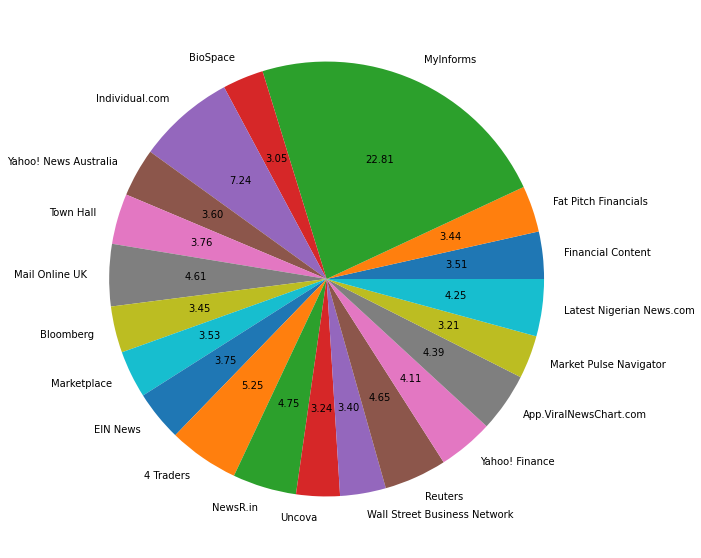

In [60]:
plt.rcParams["figure.figsize"] = (20,10)
plt.pie([(v) for v in count_counter.values()], labels=[(k) for k in count_counter],
           autopct='%.2f')
plt.show()